In [17]:
import os
import tensorflow as tf
from tensorflow import keras
import dataset_functions
import segmentation_models as sm

In [3]:
# load test set and apply pre-processing for res net 50
test_set_path = "C:/Users/jonat/Documents/DeeplearningDozerlineNotebook/dataset_dozer_line/test"
test_image_data = dataset_functions.load_test_dataset(test_set_path)
test_image_data = test_image_data.batch(8)

In [4]:
model_path = "C:/Users/jonat/Documents/DeeplearningDozerlineNotebook/unet_tensorflow_method3"
unet_model = keras.models.load_model(model_path,
                                     custom_objects={'iou_score':sm.metrics.iou_score,
                                                     'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss}
                                     )

In [15]:
files = os.listdir(os.path.join(test_set_path, "images"))
test_images = []
for file in files:
    if file.endswith(".png"):
        test_images.append(file)
print (test_images)

['000000000.png', '000000001.png', '000000002.png', '000000003.png', '000000004.png', '000000005.png', '000000006.png', '000000007.png', '000000008.png', '000000009.png', '000000010.png', '000000011.png', '000000012.png', '000000013.png', '000000014.png', '000000015.png', '000000016.png', '000000017.png', '000000018.png', '000000019.png', '000000020.png', '000000021.png', '000000022.png', '000000023.png', '000000024.png', '000000025.png', '000000026.png', '000000027.png', '000000028.png', '000000029.png', '000000030.png', '000000031.png']


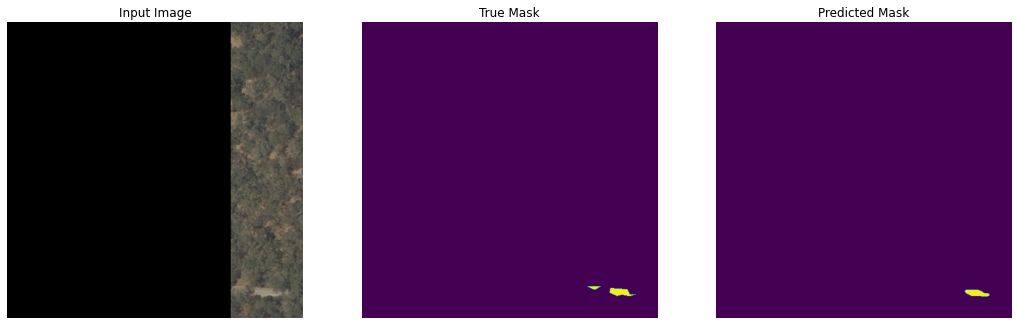

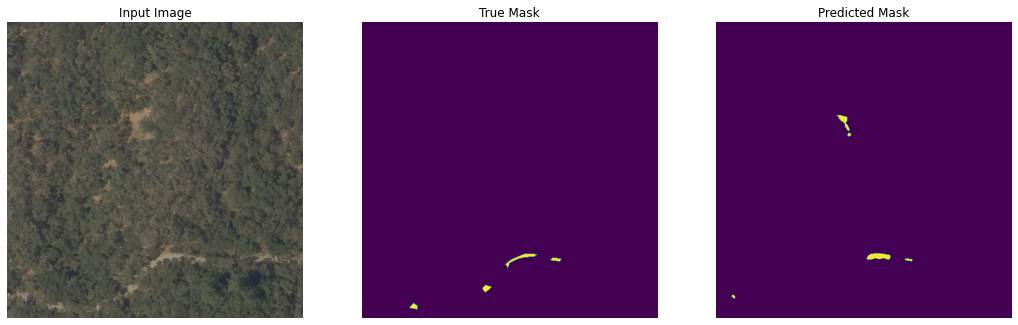

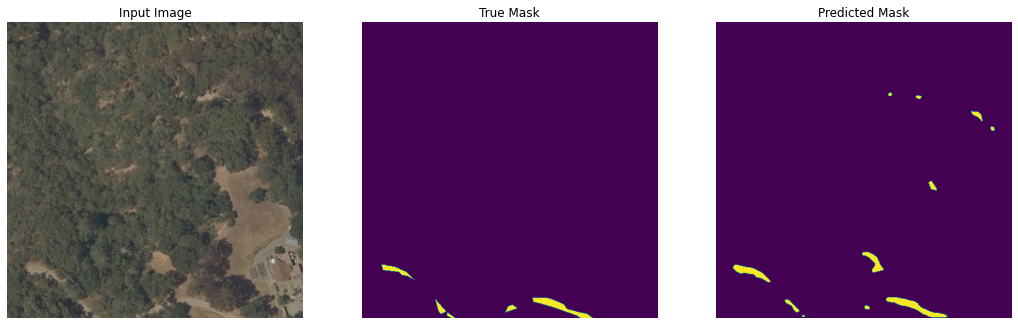

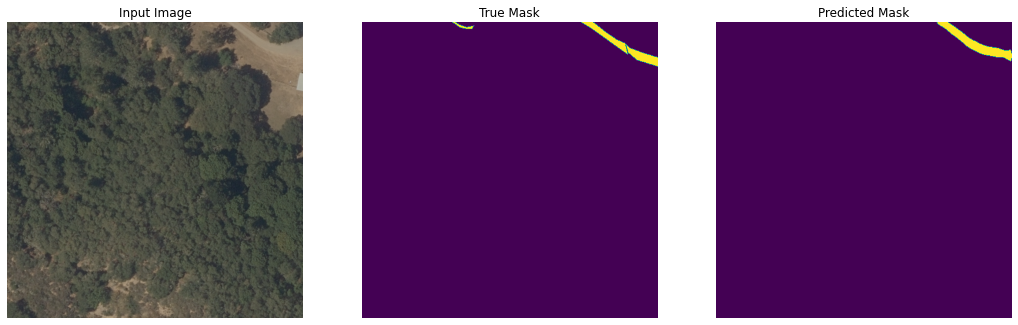

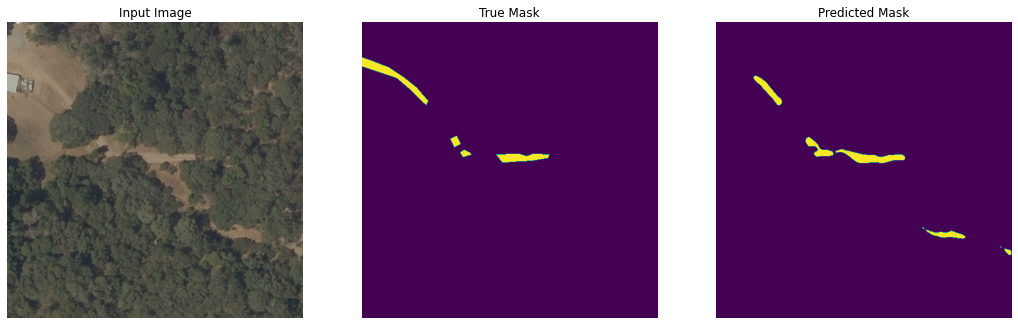

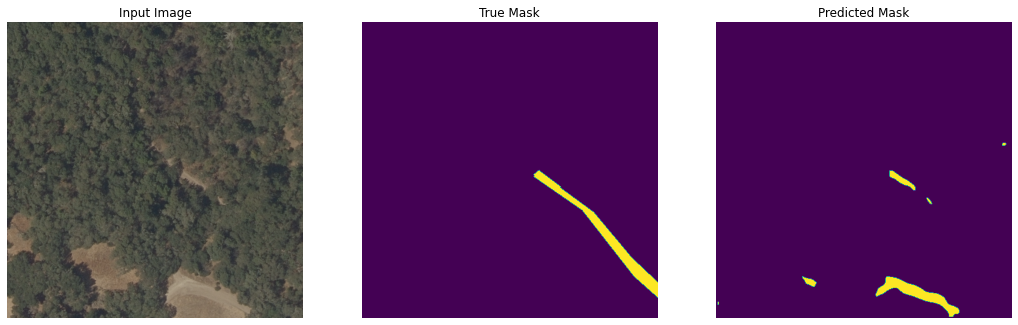

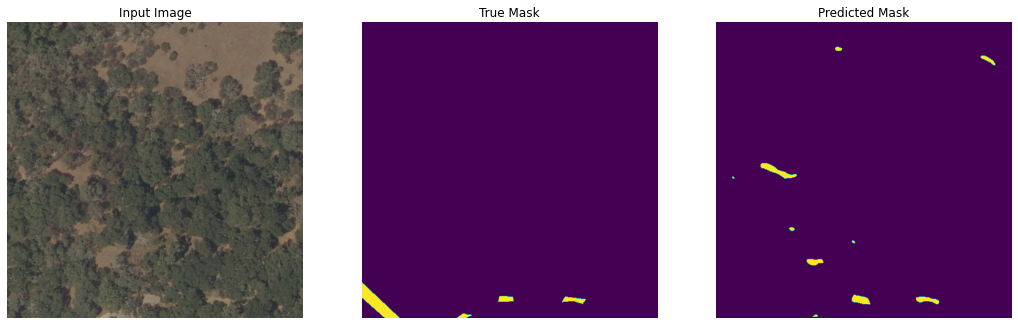

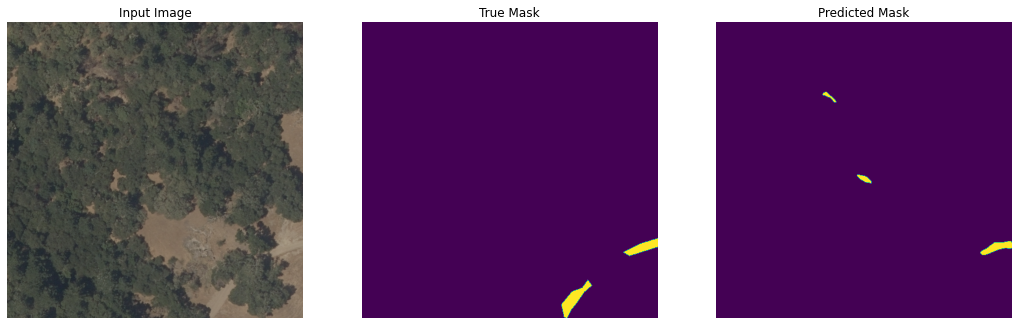

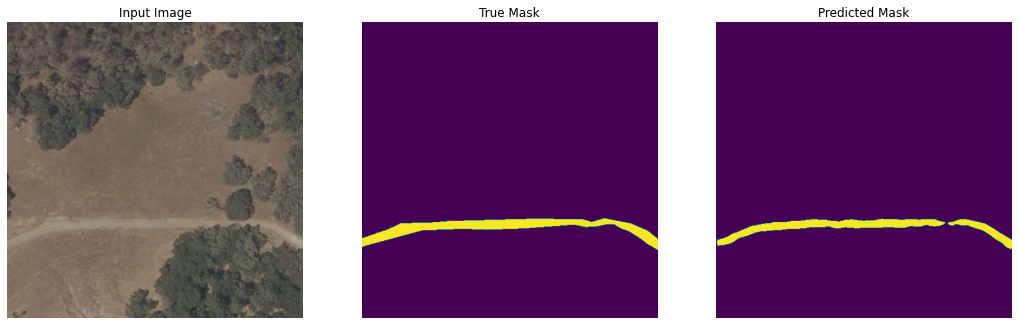

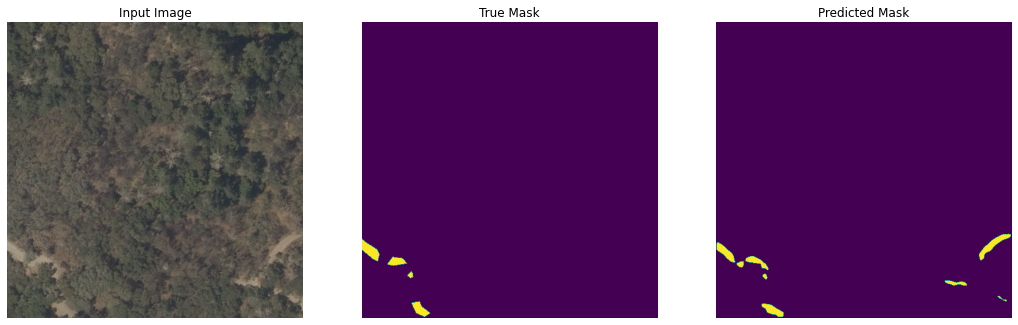

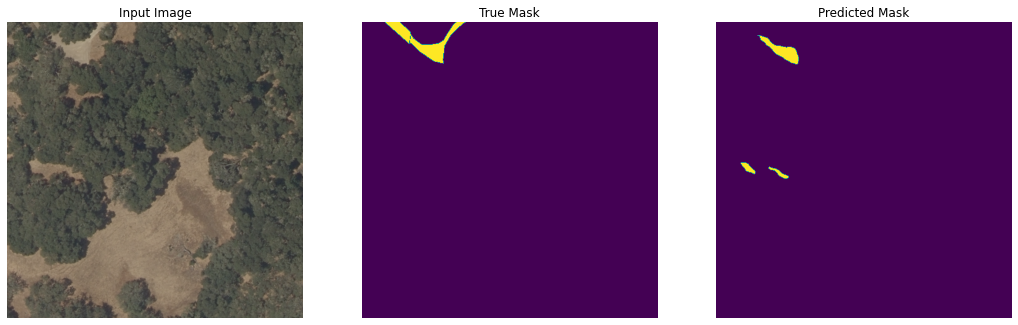

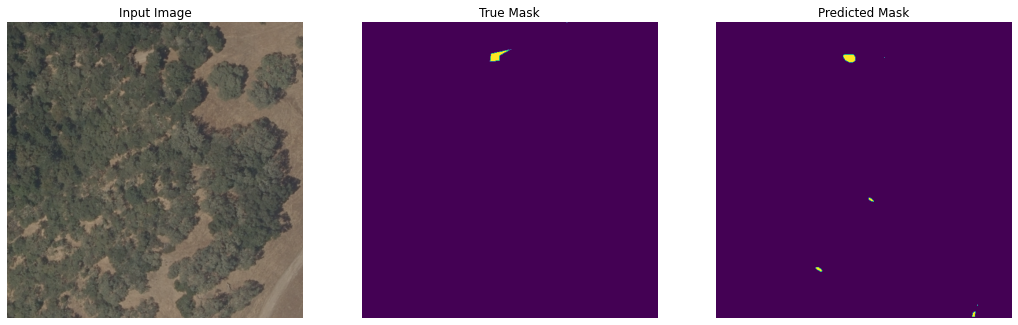

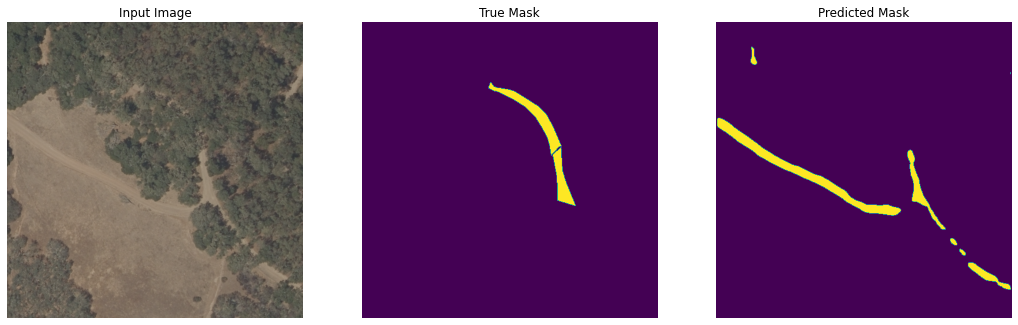

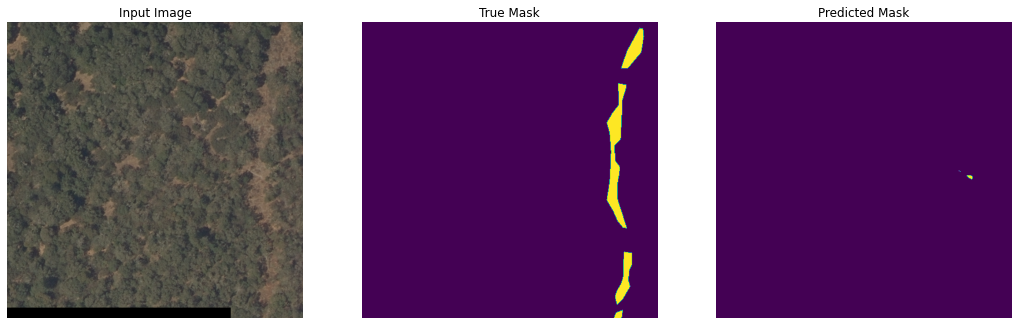

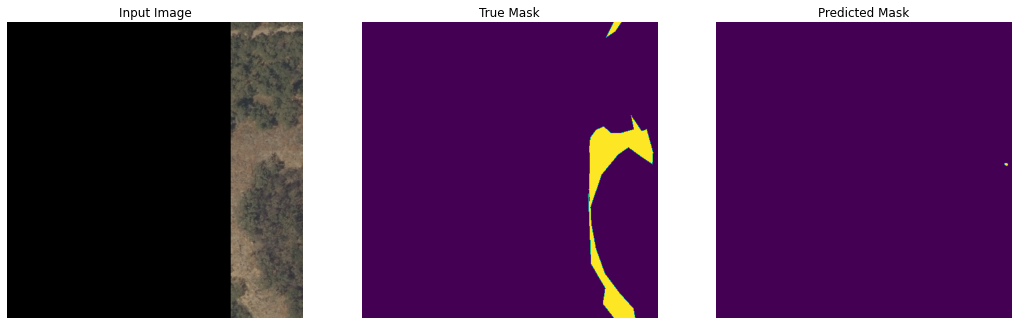

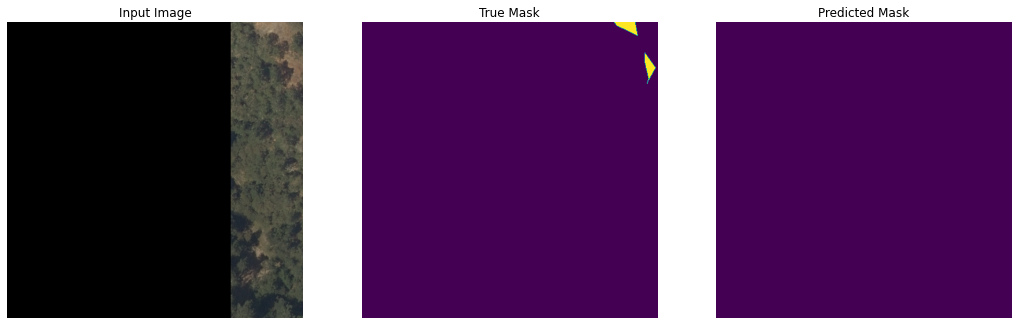

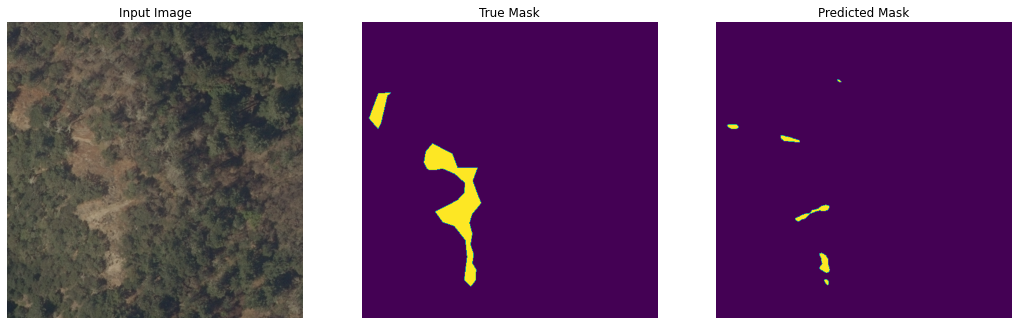

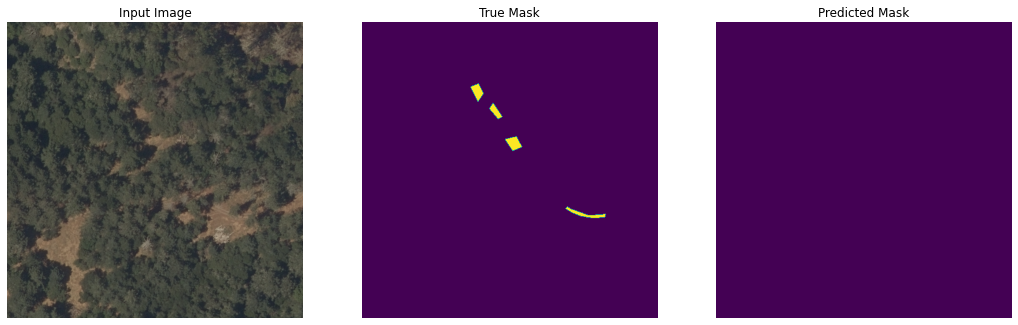

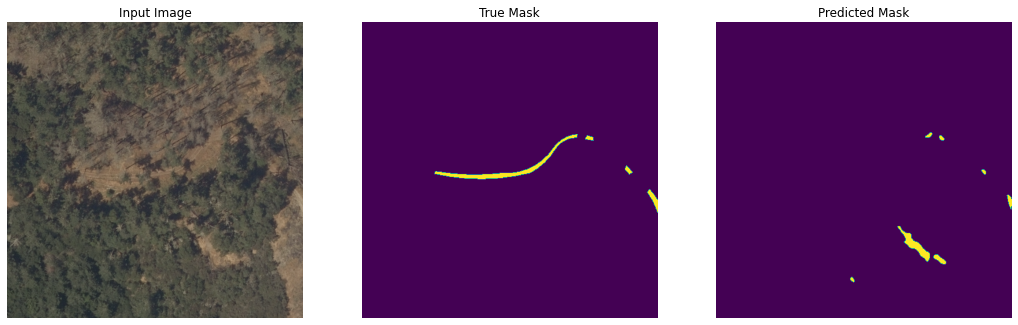

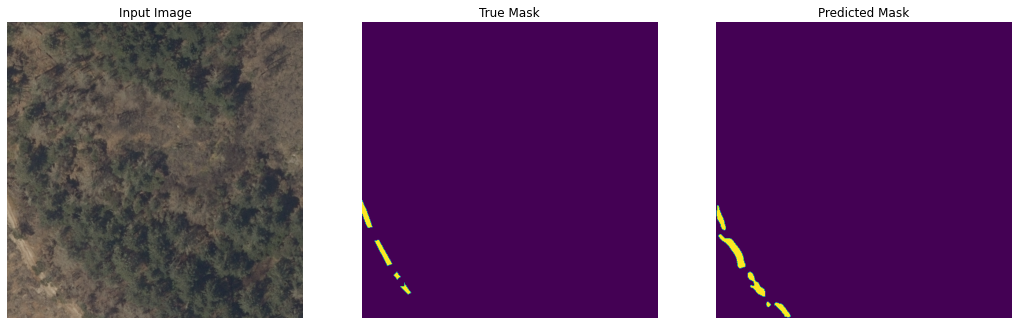

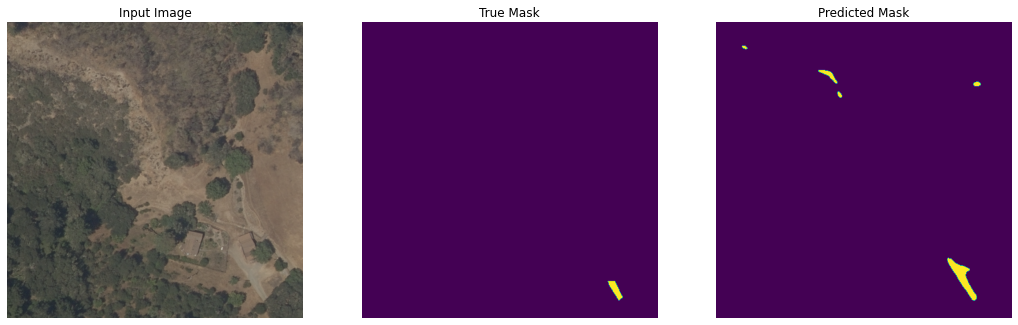

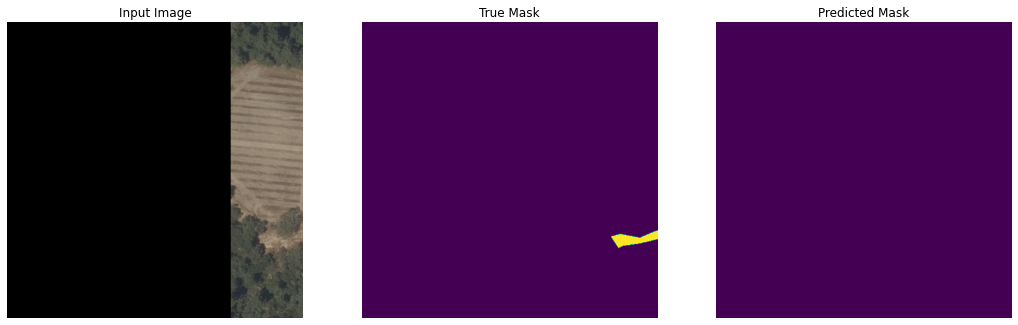

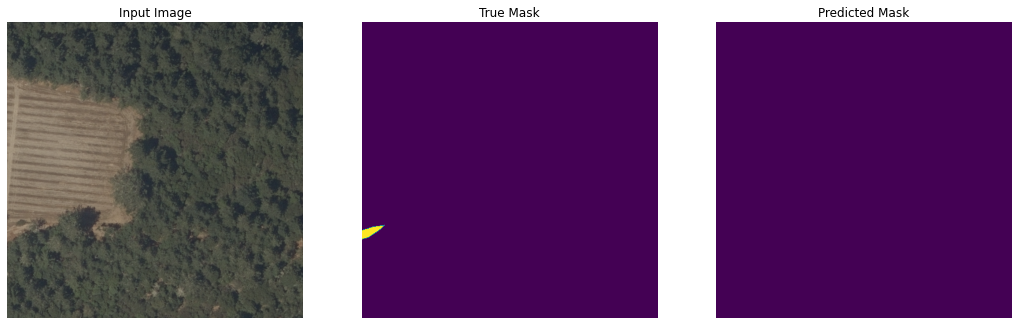

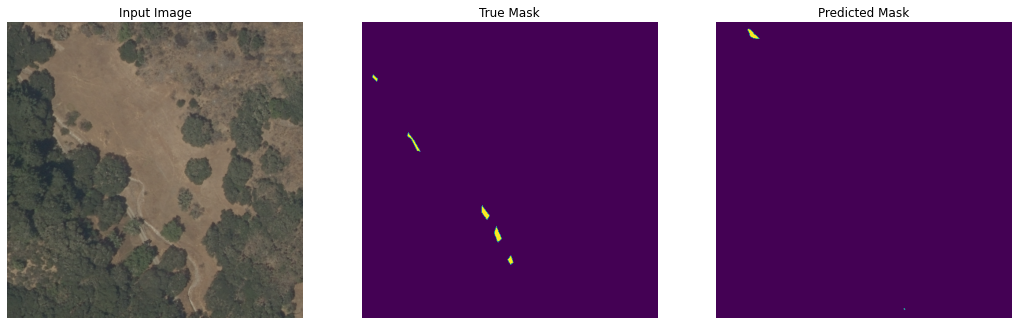

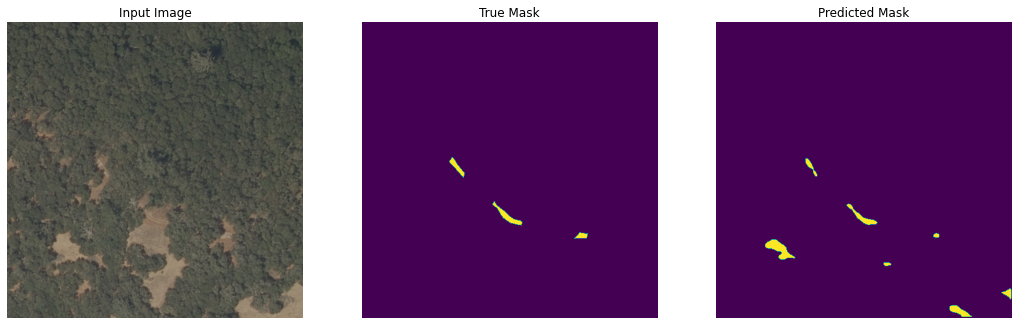

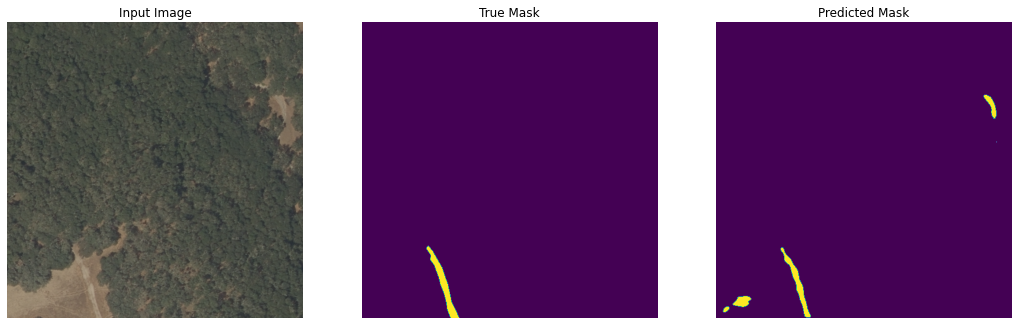

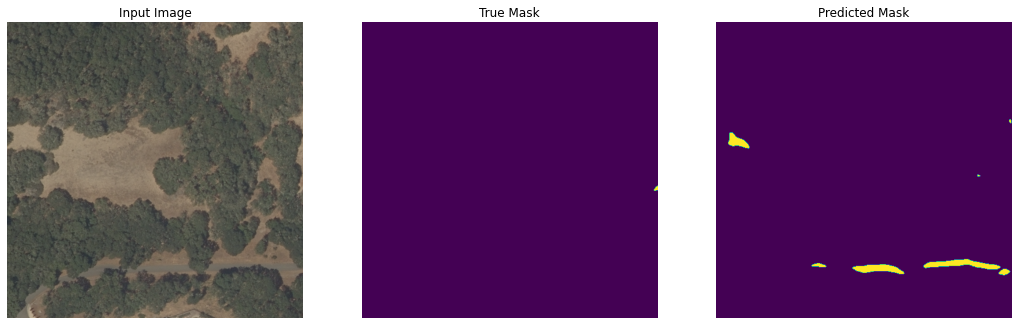

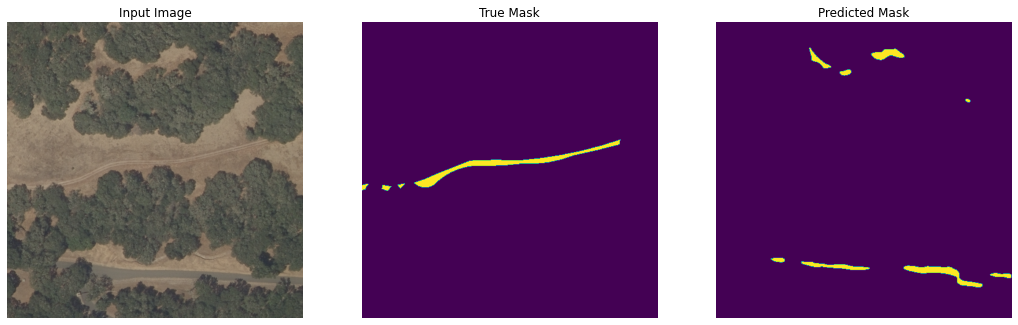

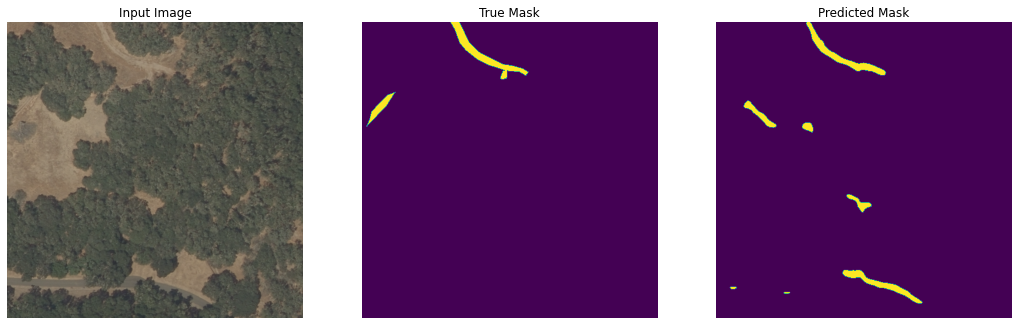

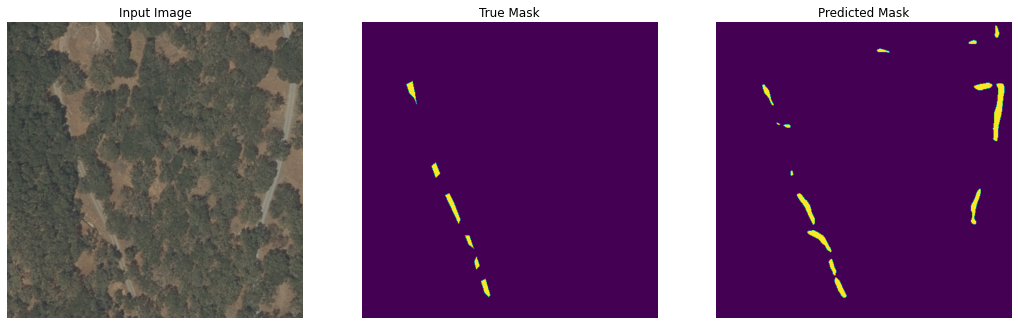

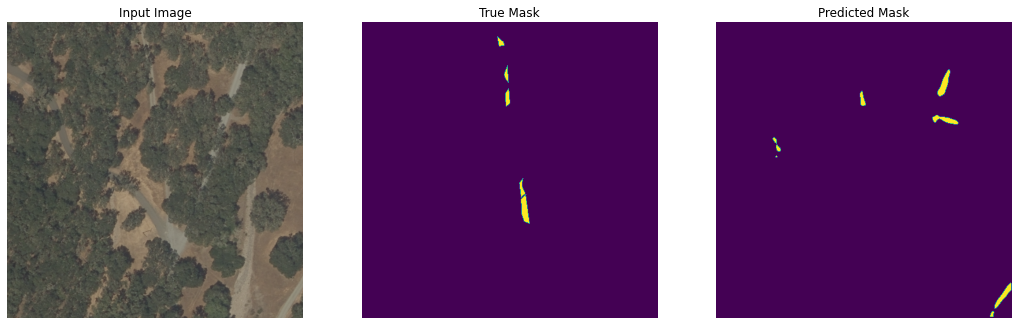

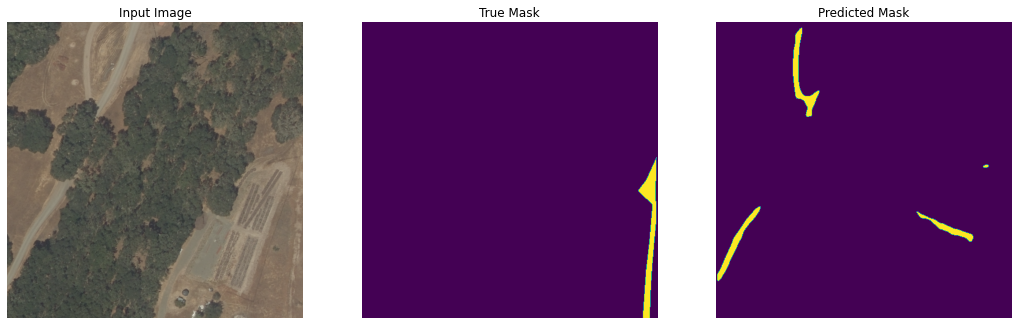

In [19]:
count = 0
for image, mask in test_image_data.take(4):
    predictions = unet_model.predict(image).round()
    for i in range(0, 8):
        image = tf.io.read_file((os.path.join(test_set_path, "images", test_images[count])))
        image = tf.image.decode_png(image, channels=3, dtype=tf.uint16)
        image = tf.image.convert_image_dtype(image, tf.uint8)
        dataset_functions.display_sample([image, mask[i], predictions[i]])
        count+=1